<a href="https://colab.research.google.com/github/yaseenraihana87/sample-git/blob/main/AML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target



In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)
kf_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("K-Fold Accuracy:", kf_scores.mean())


K-Fold Accuracy: 0.9578326346840551


In [4]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

skf_scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')

print("Stratified K-Fold Accuracy:", skf_scores.mean())


Stratified K-Fold Accuracy: 0.9560937742586555


In [5]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf.fit(X, y)


RandomForestClassifier(random_state=42)

In [6]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X, y)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [7]:
models = {
    "Random Forest": best_rf,
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf')
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f}")


Random Forest Accuracy: 0.9631
Decision Tree Accuracy: 0.9173
SVM Accuracy: 0.9122


In [8]:
best_rf.fit(X, y)
y_pred = best_rf.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))


Accuracy: 0.9947275922671354
Precision: 0.9916666666666667
Recall: 1.0
F1 Score: 0.99581589958159


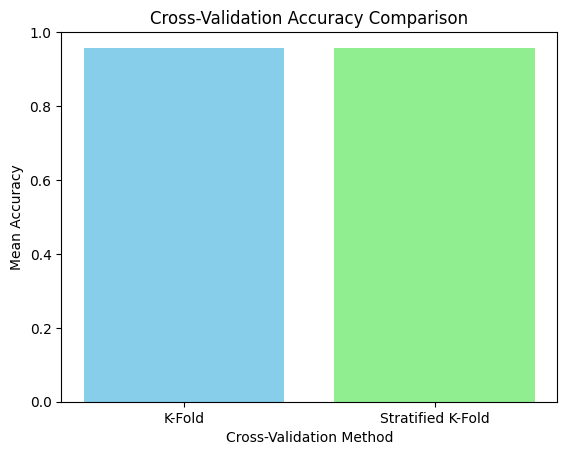

In [14]:
import matplotlib.pyplot as plt

methods = ['K-Fold', 'Stratified K-Fold']
scores = [kf_scores.mean(), skf_scores.mean()]

plt.figure()
plt.bar(methods, scores, color=['skyblue', 'lightgreen'])
plt.xlabel("Cross-Validation Method")
plt.ylabel("Mean Accuracy")
plt.title("Cross-Validation Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


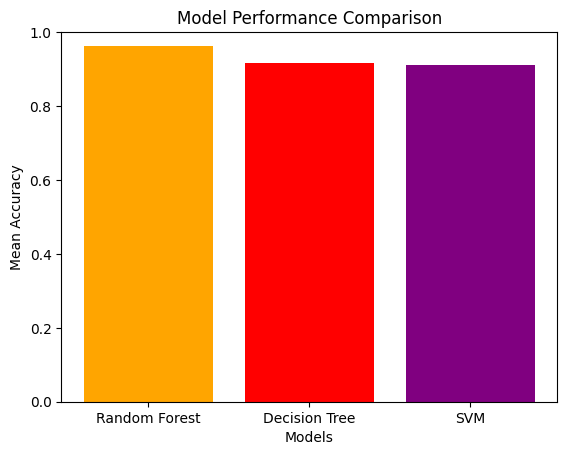

In [15]:
model_names = []
model_scores = []

for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    model_names.append(name)
    model_scores.append(score)

plt.figure()
plt.bar(model_names, model_scores, color=['orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Mean Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()


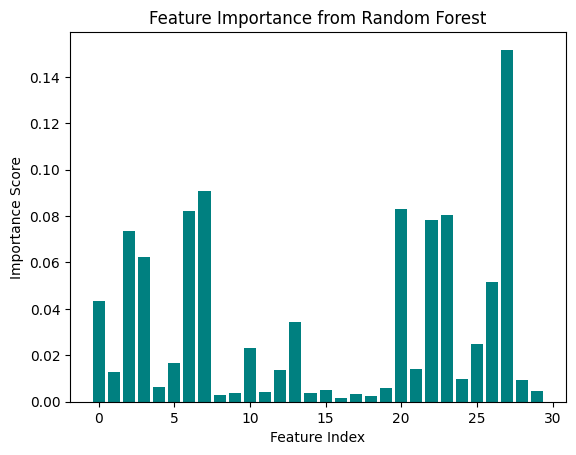

In [16]:
importances = best_rf.feature_importances_

plt.figure()
plt.bar(range(len(importances)), importances, color='teal')
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()


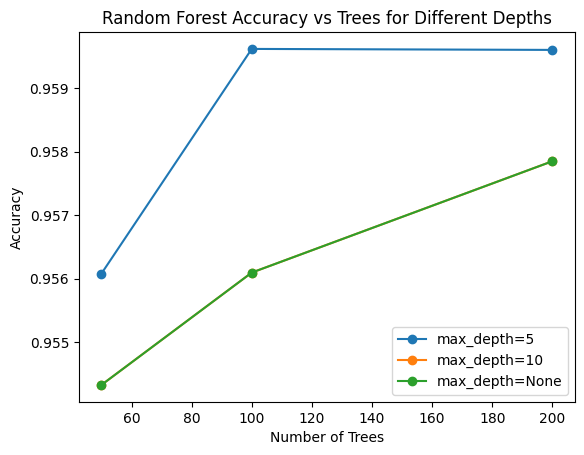

In [19]:
trees = [50, 100, 200]
depths = [5, 10, None]

for d in depths:
    scores = []
    for t in trees:
        rf = RandomForestClassifier(n_estimators=t, max_depth=d, random_state=42)
        score = cross_val_score(rf, X, y, cv=5).mean()
        scores.append(score)
    plt.plot(trees, scores, marker='o', label=f"max_depth={d}")

plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Trees for Different Depths")
plt.legend()
plt.show()


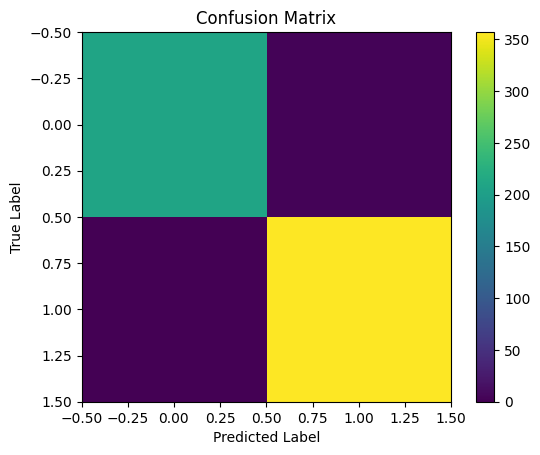

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

plt.figure()
plt.imshow(cm)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()



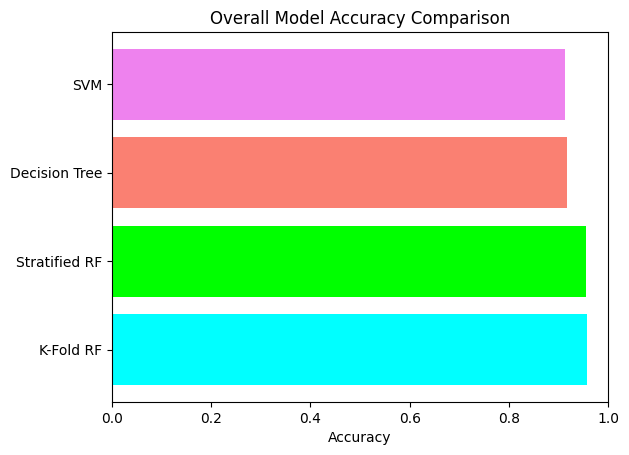

In [18]:
labels = ['K-Fold RF', 'Stratified RF', 'Decision Tree', 'SVM']
values = [
    kf_scores.mean(),
    skf_scores.mean(),
    cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5).mean(),
    cross_val_score(SVC(), X, y, cv=5).mean()
]

plt.figure()
plt.barh(labels, values, color=['cyan', 'lime', 'salmon', 'violet'])
plt.xlabel("Accuracy")
plt.title("Overall Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()
